In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols, adfuller
from statsmodels.tsa.filters.hp_filter import hpfilter
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR,ARResults
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import mse,rmse




%matplotlib inline

In [2]:
df = pd.read_csv('arima_eda.csv')

In [3]:
df.head()

,Date1,PowerA,PowerB,AirFlow_Zone4,dissolved02_All,dissolved02,Hour,Day
0,2019-08-13 16:00:00,1.034467e+06,483884.59070,3512.446118,1.663969,1.479520,16,Tue
1,2019-08-13 20:00:00,1.232730e+06,489331.77670,3528.054032,1.546575,1.511921,20,Tue
2,2019-08-14 00:00:00,1.020047e+06,378832.87310,3862.125437,1.958906,1.850203,0,Wed
3,2019-08-14 04:00:00,9.212818e+05,31880.01050,3915.824151,2.249302,2.286969,4,Wed
4,2019-08-14 08:00:00,1.214494e+06,66504.77959,3633.866031,1.902027,1.926427,8,Wed


In [4]:
temp = pd.read_excel('wbp_weather.xlsx')
temp_avg = pd.DataFrame()
temp_avg['avg'] = temp.avg.repeat(6)

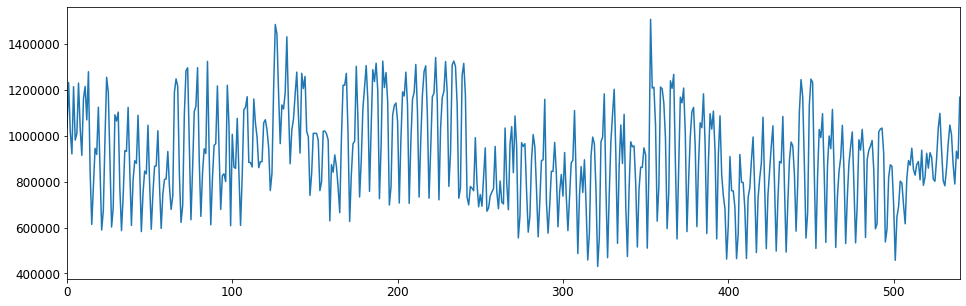

In [5]:
#Visual of power source A power usage 
df['PowerA'].plot(figsize=(16,5), fontsize=12);

In [6]:
# Creating a new DF for Power A for some additional Analysis 
df_a = pd.DataFrame(index=df.index, columns= ('PowerA', 'Hour'))
df_a['PowerA'] = df['PowerA']
df_a['Hour'] = df['Hour']
df_a.index.freq = '4H'

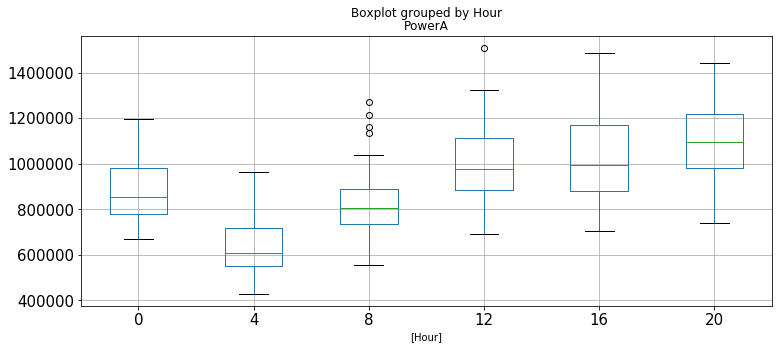

In [7]:
# Hourly Power Consumption grouped by hour 
# Can see a clear trend 4 A.M. lowest usage and 8 P.M. Highest usage 
df_a.boxplot(by='Hour',figsize=(12,5), fontsize=15);

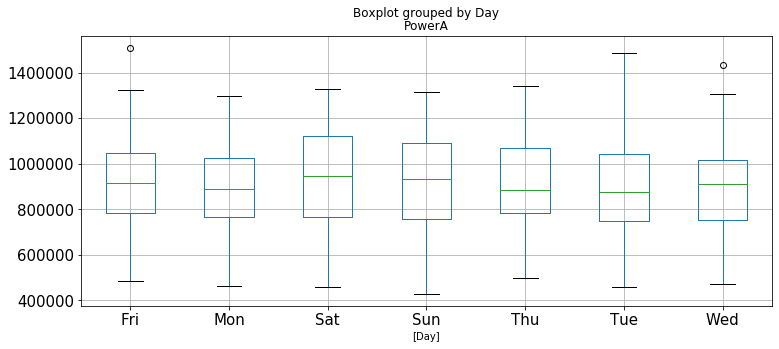

In [8]:
#No real clear trend.  Would probably need more data to determine if there is a difference 
df_a_day = pd.DataFrame(index=df.index)
df_a_day['PowerA'] = df['PowerA']
df_a_day['Day'] = df['Day']
df_a_day.boxplot(by='Day',figsize=(12,5), fontsize=15);